# Tensorboard の情報をInlineで表示したい

.eventを読み込んでからmatplotlibで表示しなおす

In [1]:
import pickle

In [5]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [46]:
def extract_scalar_from_event(path):
    event_acc = EventAccumulator(path, size_guidance={'scalars': 0})
    event_acc.Reload() # ログファイルのサイズによっては非常に時間がかかる
    target_key = ['step', 'value', 'wall_time']
    scalars = {}
    for tag in event_acc.Tags()['scalars']:
        events = event_acc.Scalars(tag)
        scalars[tag] = [{k: event.__getattribute__(k) for k in target_key} for event in events]
    return scalars

In [61]:
def extract_values(dict_list, key):
    return [_dict[key] for _dict in dict_list]

def plot_from_dict(scalar_dict, key, ax=None):
    if ax is None:
        ax = plt

    _s_dict_list = scalar_dict[key]
    x = extract_values(_s_dict_list, 'step')
    y = extract_values(_s_dict_list, 'value')
    ax.plot(x, y, label=key)
    
    ax.legend()

In [47]:
path = './runs/Nov05_07-35-44_0f950e7ca074MNIST_VAE/events.out.tfevents.1572939344.0f950e7ca074.2853.3'
scalar_dict = extract_scalar_from_event(path)

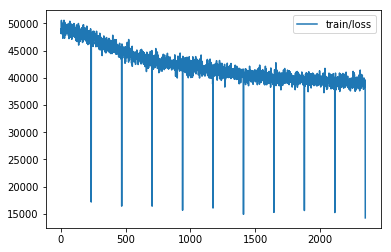

In [59]:
plot_from_dict(scalar_dict, ['train/loss'])

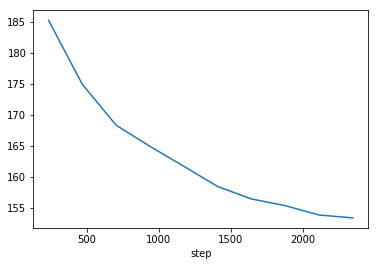

In [55]:
import pandas as pd
df = pd.DataFrame(scalar_dict['test/loss'])
df.set_index('step')[['value']].plot()

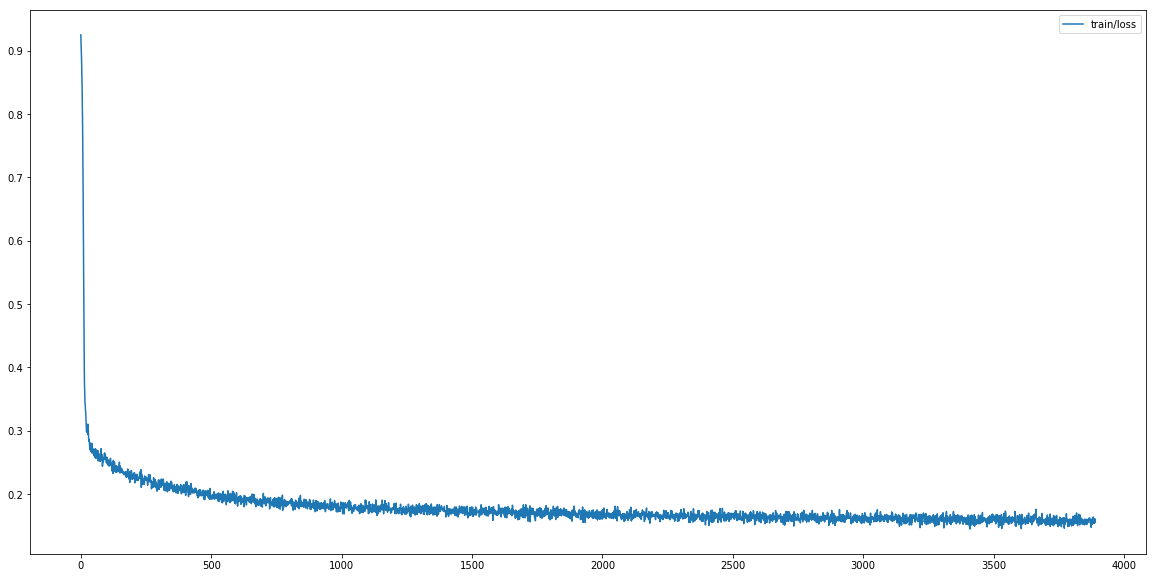

In [17]:
plt.figure(figsize=(20, 10))
plot_from_dict(scalars)